# 1.1
## Ниже будут рассмотрены темы:
* используемые типы данных;
* создание таблицы SQL запросом;
* добавление данных SQL запросом.

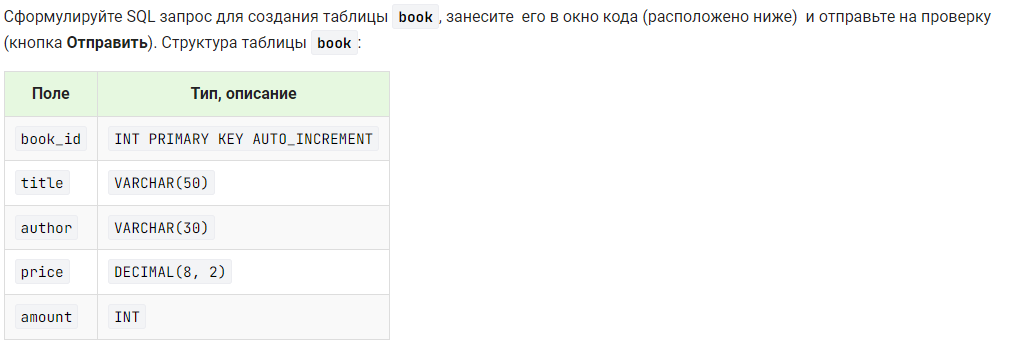

~~~~mySQL
CREATE TABLE book(
    book_id INT PRIMARY KEY AUTO_INCREMENT,
    title VARCHAR(50),
    author VARCHAR(30),
    price DECIMAL(8, 2),
    amount INT
    );
~~~~

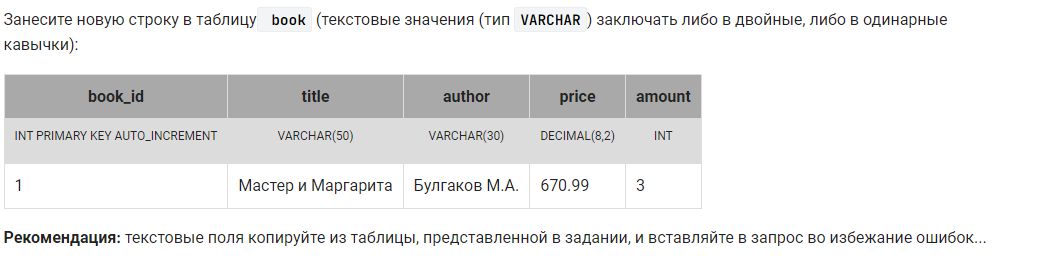

~~~~mySQL
INSERT INTO book ( title, author, price, amount)
    VALUES ('Мастер и Маргарита', 'Булгаков М.А.', 670.99, 3);
~~~~

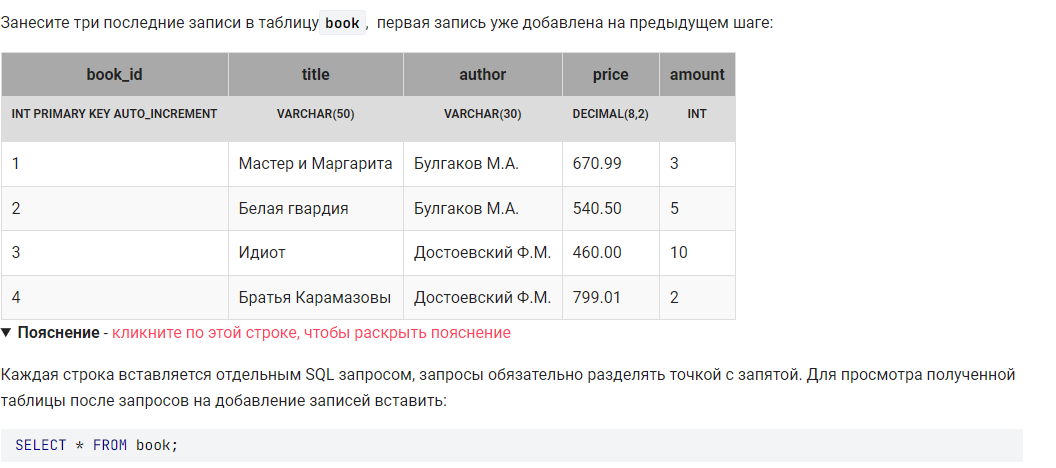

~~~~mySQL
INSERT INTO book ( title, author, price, amount)
    VALUES 
        ('Белая гвардия', 'Булгаков М.А.', 540.50, 5),
        ('Идиот', 'Достоевский Ф.М.', 460.00, 10),
        ('Братья Карамазовы', 'Достоевский Ф.М.', 799.01, 2);    
~~~~

# 1.2
## Далее будет рассмотрен синтаксис и семантика следующих SQL запросов:
* выборка всех данных из таблицы;   
* выборка данных из отдельных столбцов; 
* присвоение новых имен столбцам при формировании выборки; 
* создание вычисляемых столбцов; 
* вычисляемые столбцы, математические функции; 
* вычисляемые столбцы, логические функции; 
* выборка данных по простому условию; 
* выборка данных с использованием логических выражений и операций; 
* выборка данных, операторы BETWEEN, IN; 
* выборка текстовых данных по шаблону, оператор LIKE; 
* выборка данных с сортировкой.

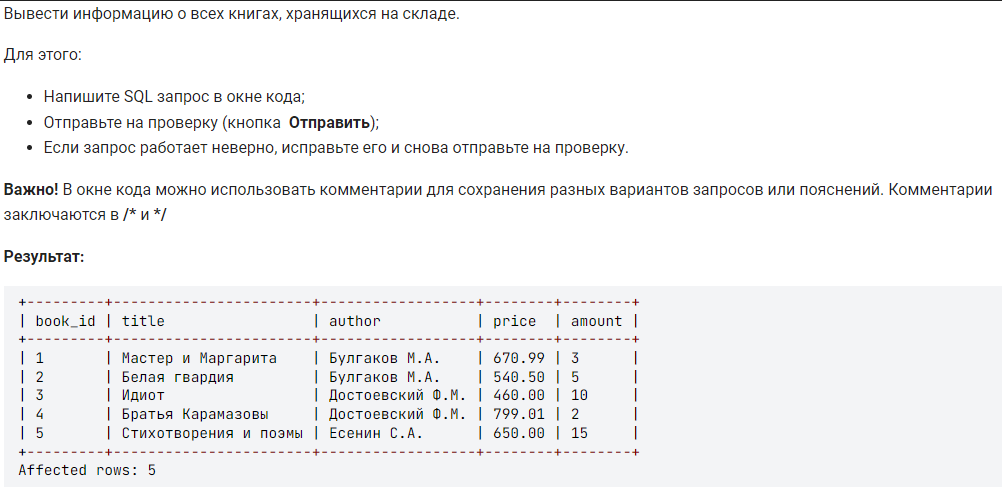

~~~~mySQL
SELECT * FROM book;
~~~~

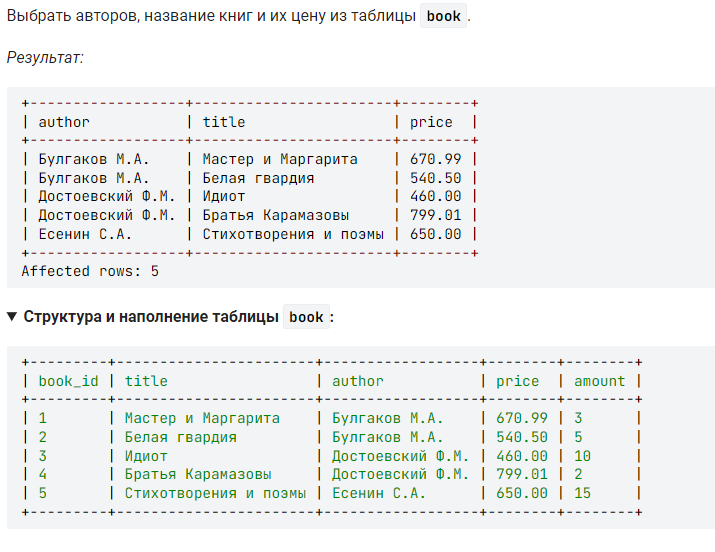

~~~~mySQL
SELECT author, title,price
  FROM book;
~~~~

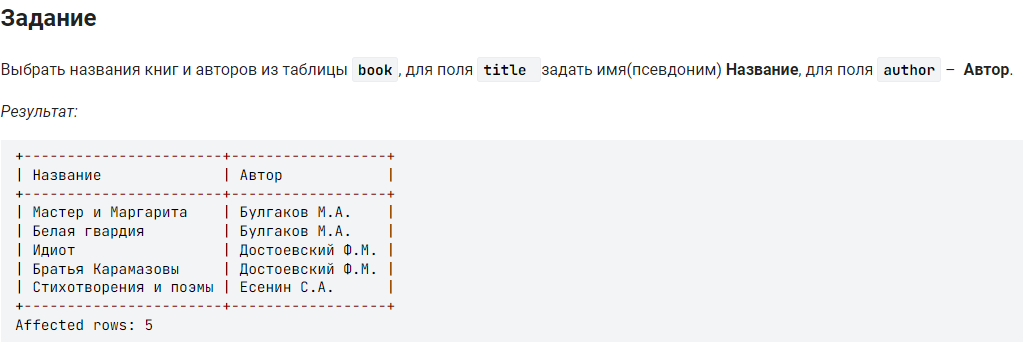

~~~~mySQL
SELECT title AS Название,
       author AS Автор
FROM book;
~~~~

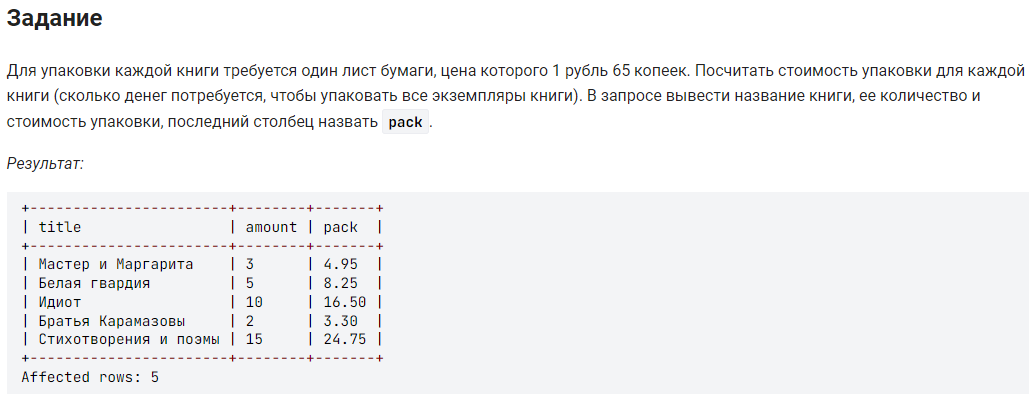

~~~~mySQL
SELECT title,
       amount,
       1.65 * amount AS pack
  FROM book;
~~~~

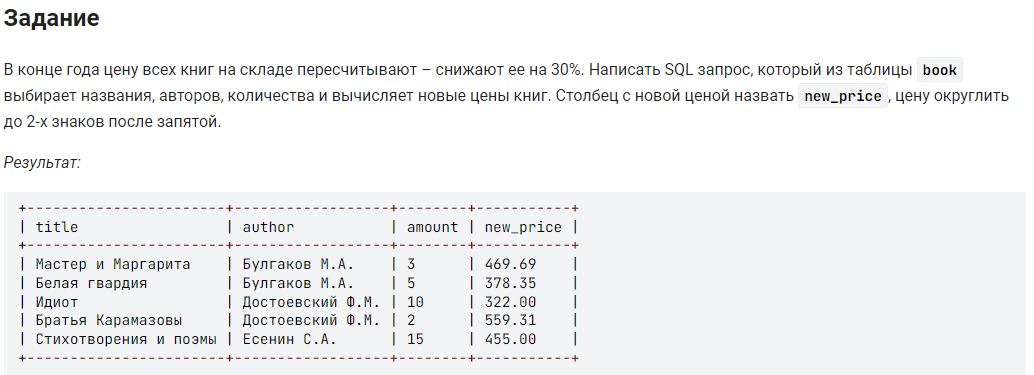

~~~~mySQL
SELECT title,
       author,
       amount,
       ROUND(price * 0.7, 2) AS new_price
  FROM book;
~~~~

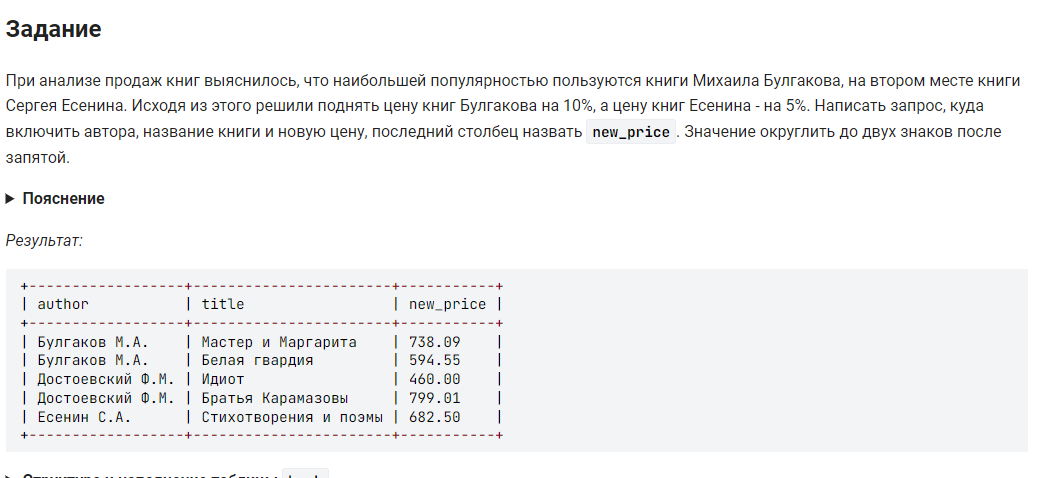

~~~~mySQL
SELECT author,
       title,
       ROUND(IF (author IN ('Булгаков М.А.', 'Есенин С.А.'),
                 IF ( author = 'Булгаков М.А.', price * 1.1, price * 1.05), 
                price), 2) AS new_price
  FROM book;
~~~~

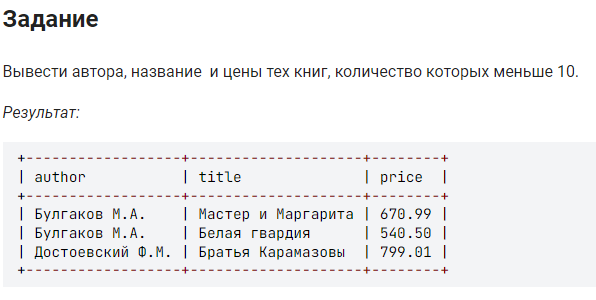

~~~~mySQL
SELECT author,
       title, 
       price
  FROM book
 WHERE amount < 10;
~~~~

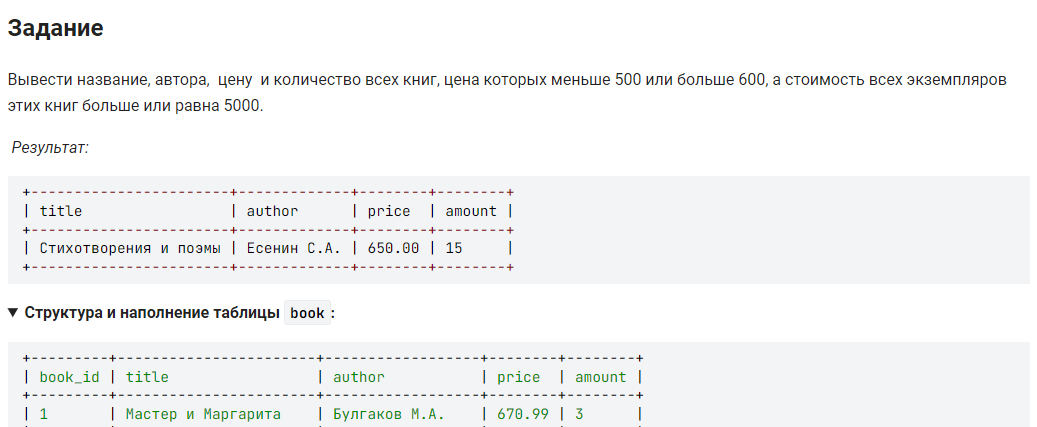

~~~~mySQL
SELECT title,
       author,
       price,
       amount
  FROM book
 WHERE (price < 500 OR price > 600)
   AND price * amount >= 5000;
~~~~

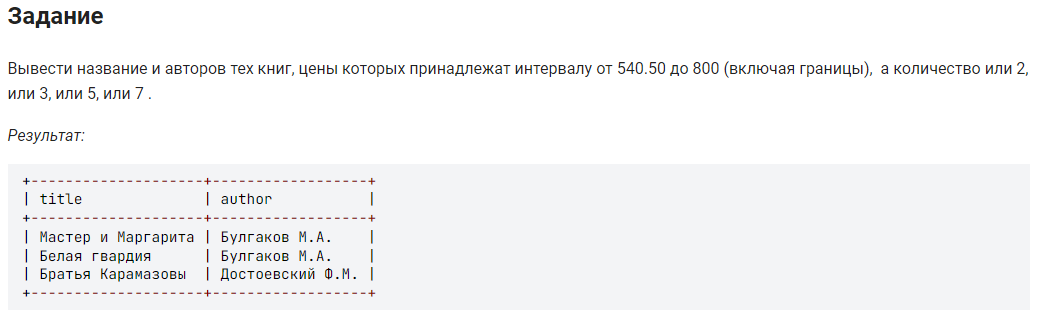

~~~~mySQL
SELECT title, 
       author
  FROM book
 WHERE price BETWEEN 540.50 AND 800
   AND amount IN(2, 3, 5, 7);
~~~~

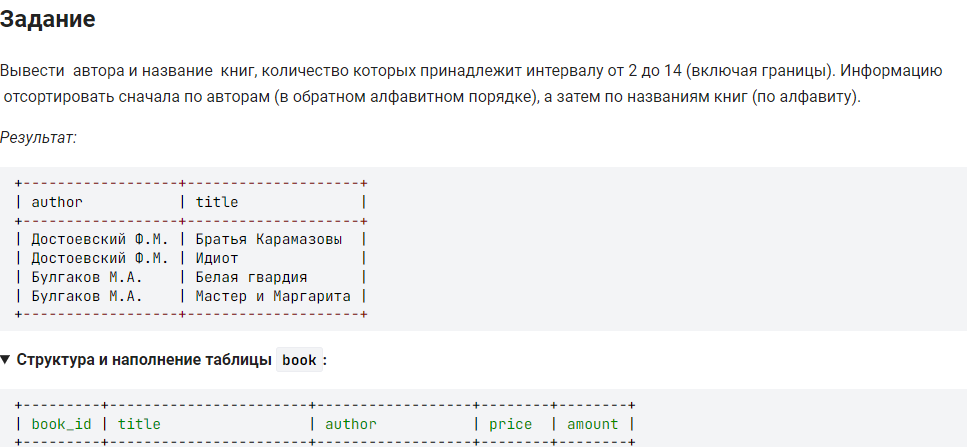

~~~~mySQL
SELECT author, title
  FROM book
 WHERE amount BETWEEN 2 AND 14
 ORDER BY author DESC, title;
~~~~

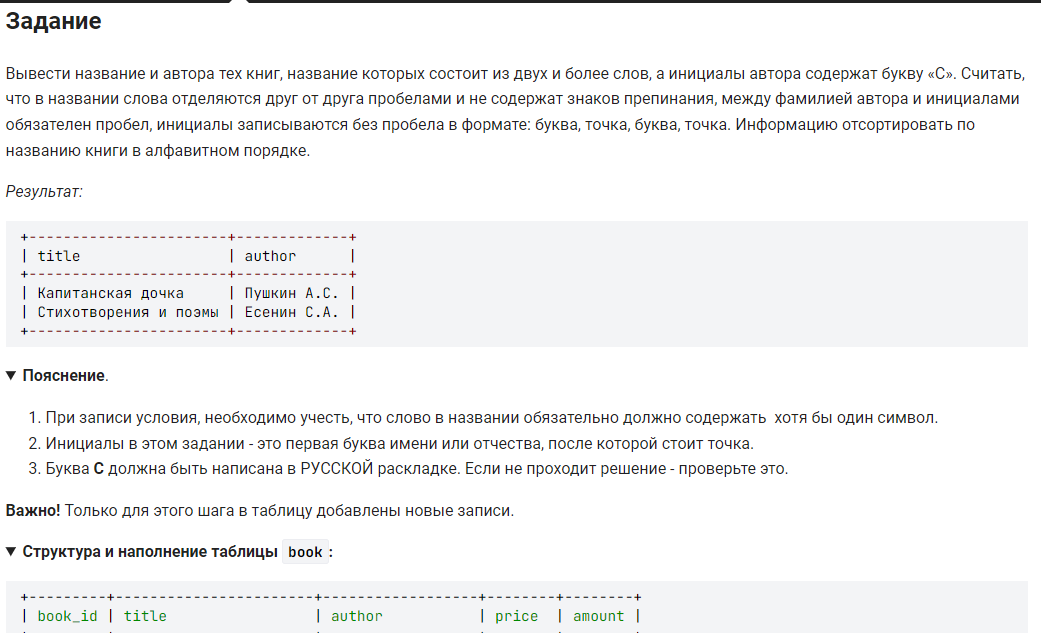

~~~~mySQL
SELECT title, author
  FROM book 
 WHERE title LIKE '%_ _%'
   AND (author LIKE '% С.%'
        OR author LIKE '%.С.')
 ORDER BY title;
~~~~

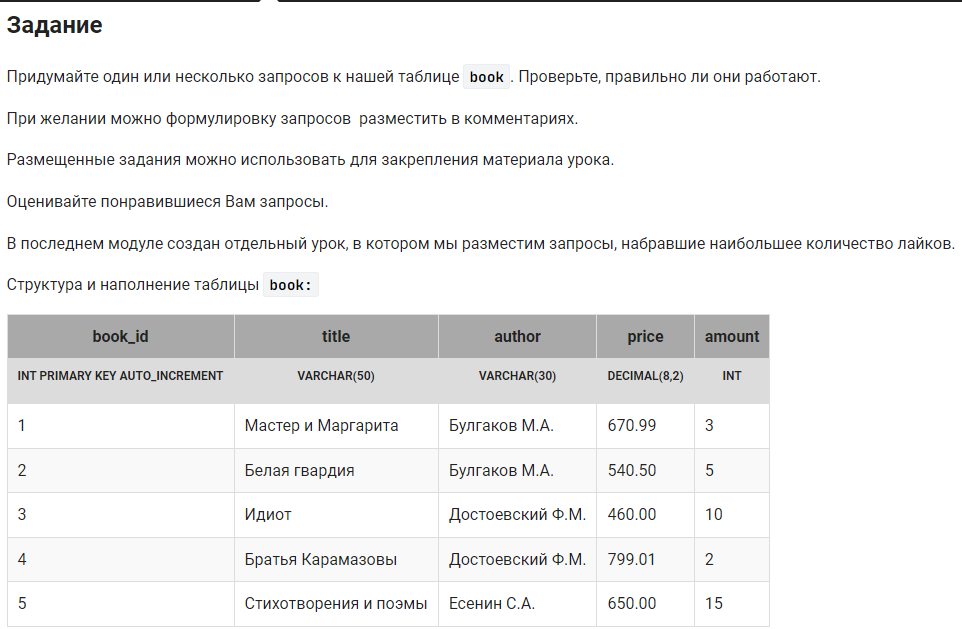

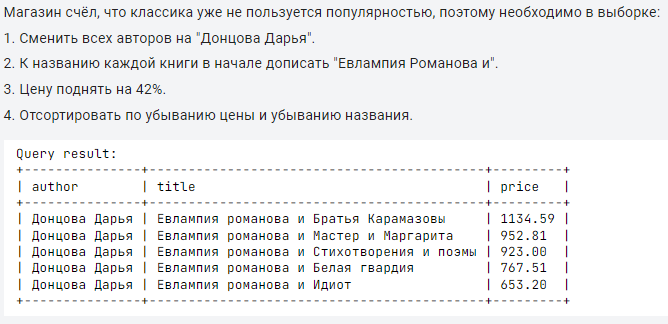

~~~~mySQL
SELECT 'Донцова Дарья' AS author,
       CONCAT('Евлампия Романова и ', title) AS title,
       ROUND(price * 1.42, 2)
  FROM book
 ORDER BY price DESC, title DESC;
~~~~

# 1.3
## Содержание урока
Ниже рассмотрим запросы, которые реализуют:

* выборку уникальных элементов столбца;
* выборку данных (групповые функции sum и count);
* выборку данных (групповые функции min, max и avg);
* выборку данных с вычислением (групповые функции);
* вычисления по таблице целиком;
* выборку данных по условию (групповые функции)
* выборка данных по условию (групповые функции WHERE и HAVING).

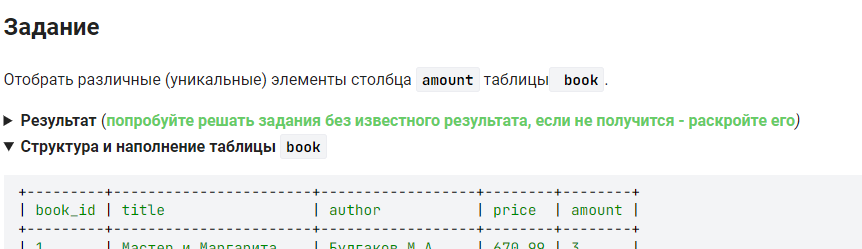

~~~~mySQL
SELECT DISTINCT amount
  FROM book;
~~~~

~~~~mySQL
SELECT amount
  FROM book
 GROUP BY amount;
~~~~

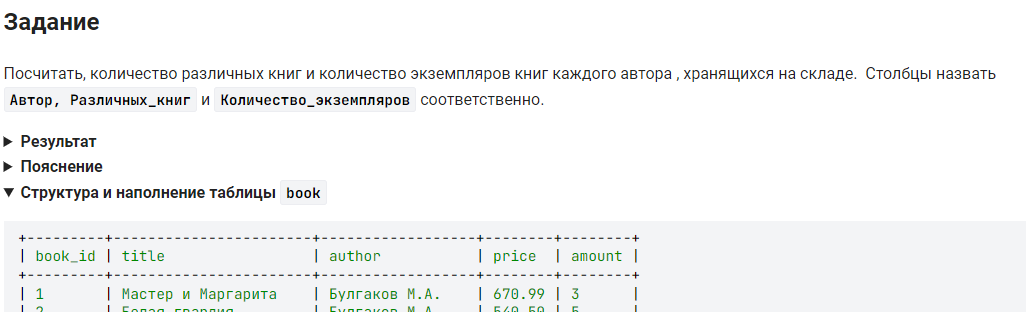

~~~~mySQL
SELECT author AS Автор, 
       COUNT(title) AS Различных_книг,
       SUM(amount) AS Количество_экземпляров
  FROM book
 GROUP BY author;
~~~~

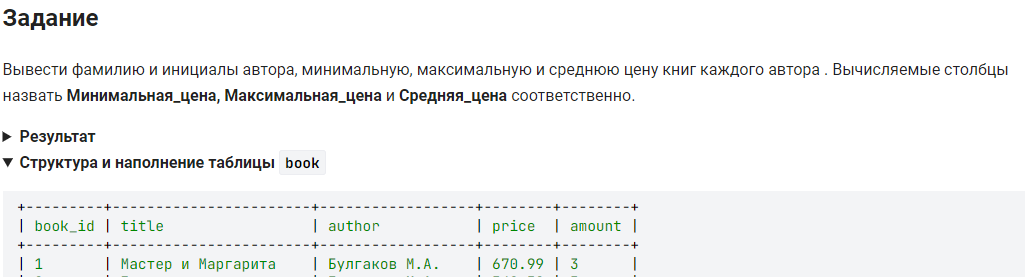

~~~~mySQL
SELECT author,
       MIN(price) AS Минимальная_цена, 
       MAX(price) AS Максимальная_цена,
       AVG(price) AS Средняя_цена
  FROM book
 GROUP BY author;
~~~~

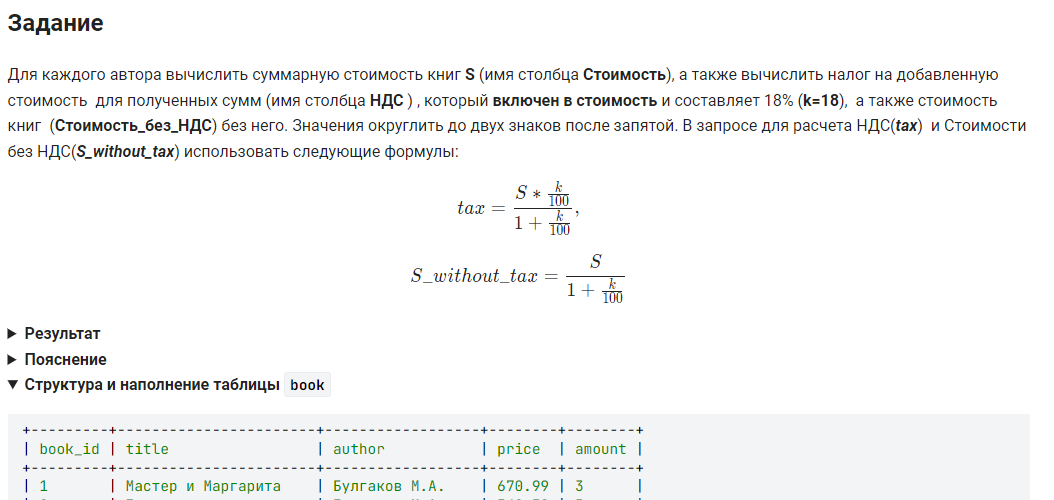

~~~~mySQL
SELECT author,
       SUM(price * amount) AS Стоимость,
       ROUND((SUM(price * amount) * 0.18) / 1.18, 2) AS НДС,
       ROUND(SUM(price * amount) / 1.18, 2) AS Стоимость_без_НДС
  FROM book
 GROUP BY author;
~~~~

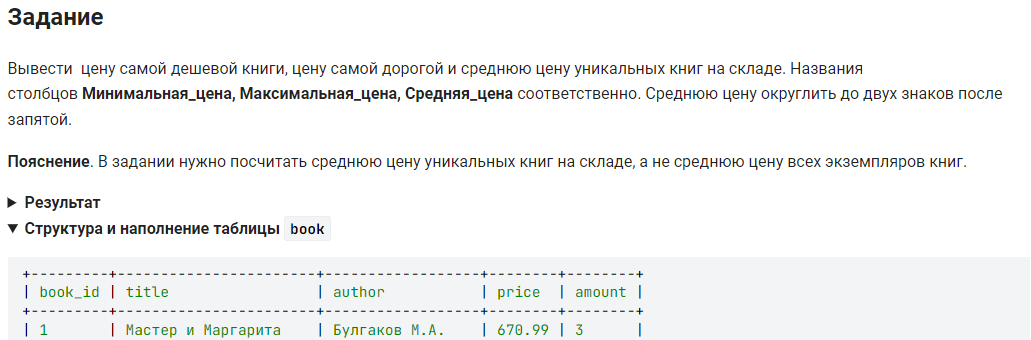

~~~~mySQL
SELECT MIN(price) AS Минимальная_цена,
       MAX(price) AS Максимальная_цена, 
       ROUND(AVG(price), 2) AS Средняя_цена
  FROM book;
~~~~

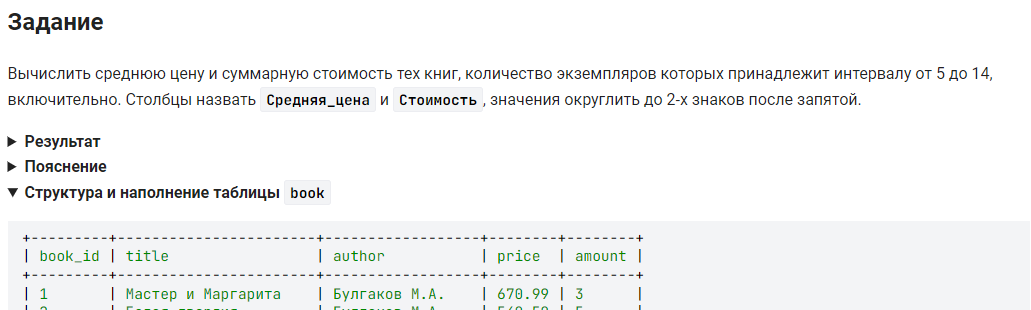

~~~~mySQL
SELECT ROUND(AVG(price), 2) AS Средняя_цена,
       SUM(price * amount)  AS Стоимость
  FROM book
 WHERE amount BETWEEN 5 AND 14;
~~~~

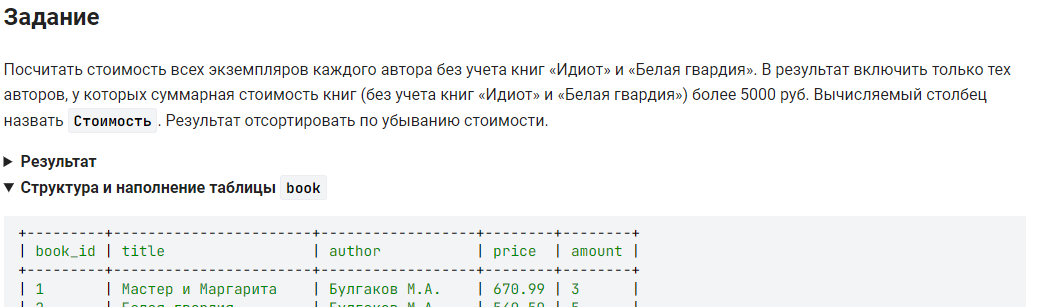

~~~~mySQL
SELECT author,
       SUM(price * amount) AS Стоимость
  FROM book
 WHERE title NOT IN ('Идиот', 'Белая гвардия')
 GROUP BY author
HAVING SUM(price * amount) > 5000
 ORDER BY Стоимость DESC;
~~~~

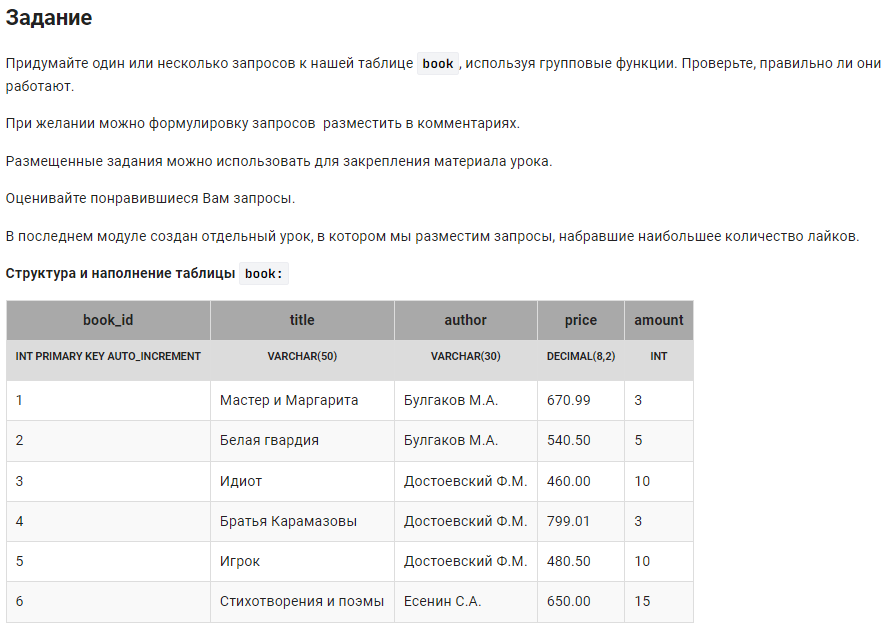

"Узнать сколько авторов, у которых есть не менее 2-х книг со стоимостью более 500 и количеством более 1 шт на складе. Вывести автора, количество различных произведений автора, минимальную цену и количество книг на складе.".
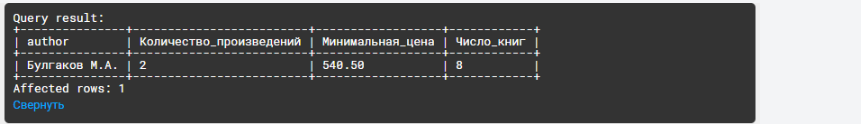

~~~~mySQL
SELECT author, 
       COUNT(DISTINCT(title)),
       MIN(price),
       SUM(amount)
  FROM book
 WHERE price > 500 and amount > 1
 GROUP BY author
HAVING COUNT(title) >= 2
~~~~

# 1.4
## Вложенные запросы.

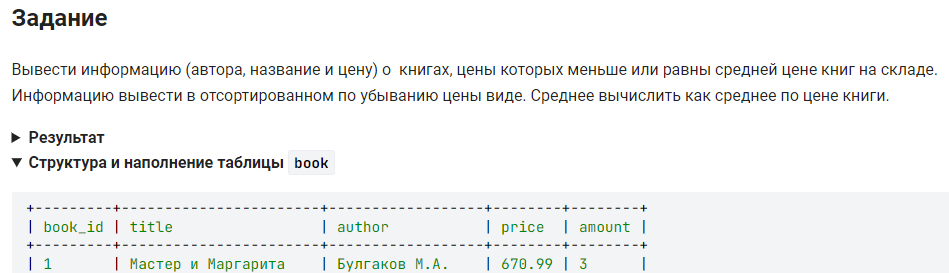

~~~~mySQL
SELECT author,
       title,
       price
  FROM book
 WHERE price <= (SELECT ROUND(AVG(price), 2)
                   FROM book)
 ORDER BY price DESC;
~~~~

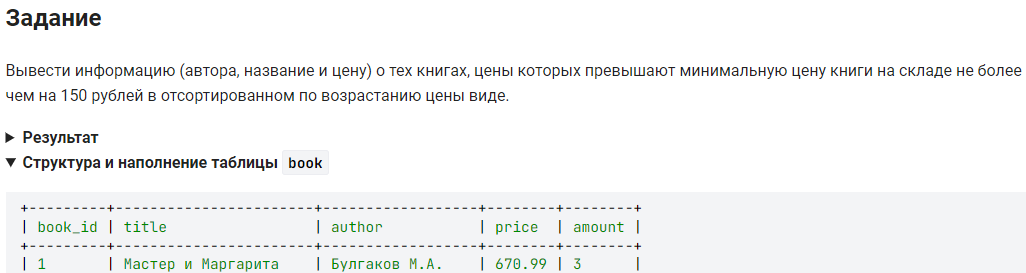

~~~~mySQL
SELECT author,
       title,
       price
  FROM book
 WHERE price - (SELECT MIN(price)
                  FROM book) <= 150
 ORDER BY price;
~~~~

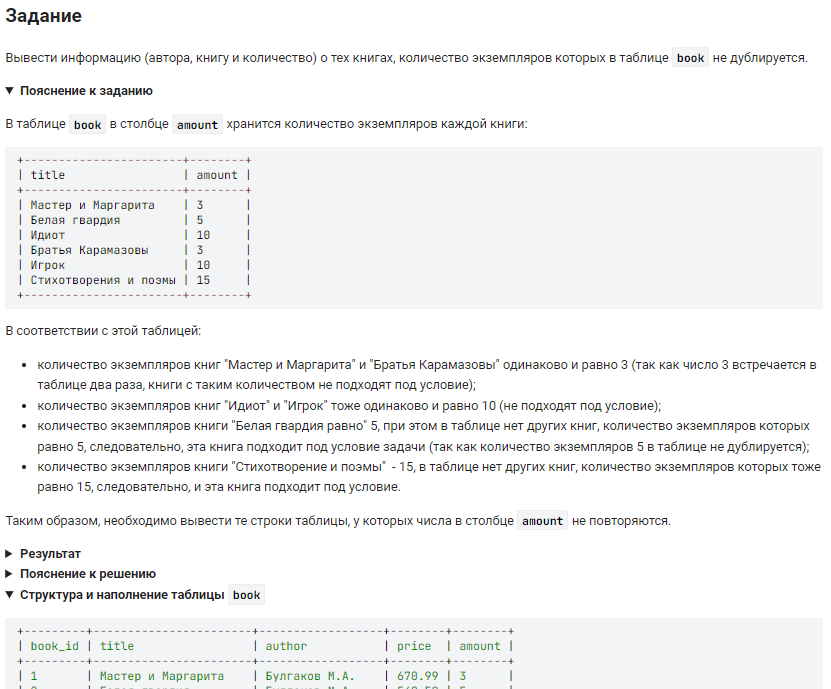

~~~~mySQL
SELECT author,
       title,
       amount
  FROM book
 WHERE amount IN (SELECT amount
                    FROM book
                   GROUP BY amount
                  HAVING COUNT(*) = 1);
~~~~

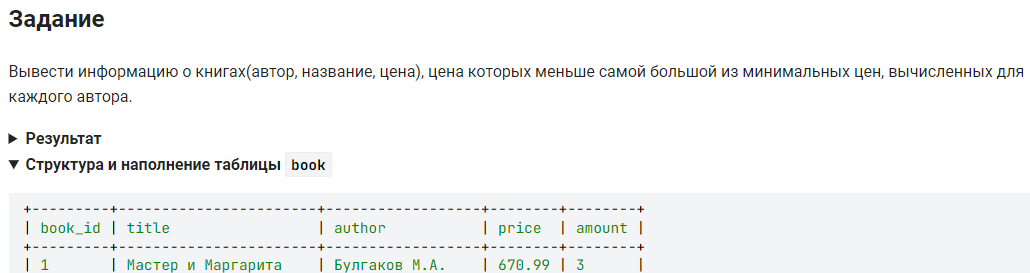

~~~~mySQL
SELECT author,
       title,
       price
  FROM book
 WHERE price < ANY(SELECT MIN(price)
                     FROM book
                    GROUP BY author);
~~~~

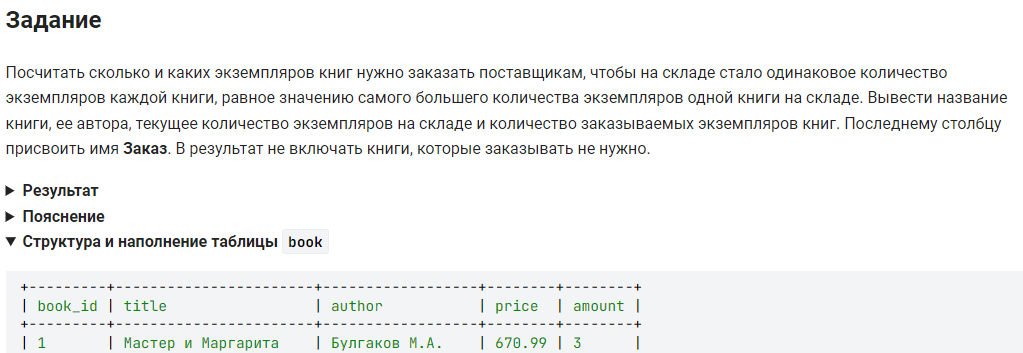

~~~~mySQL
SELECT title,
       author,
       amount,
       (SELECT MAX(amount)
          FROM book
       ) - amount AS Заказ
  FROM book
WHERE amount < (SELECT MAX(amount)
                  FROM book);
~~~~

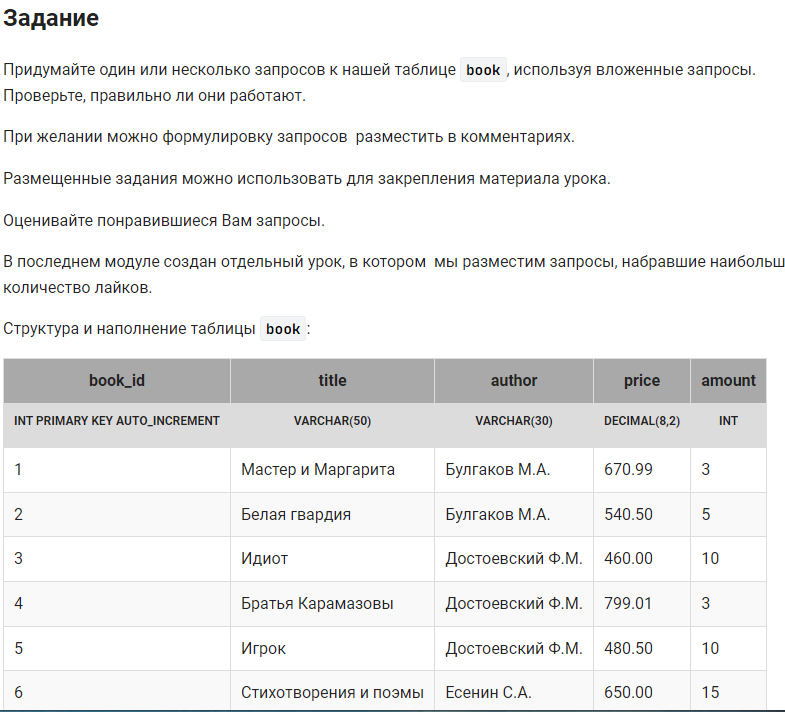

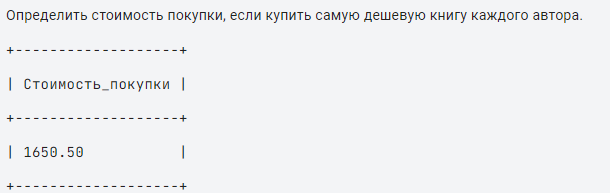

~~~~mySQL
SELECT SUM(min_price) AS Стоимость_покупки
FROM (SELECT MIN(price) AS min_price
             FROM book
            GROUP BY author) AS min_book_price;
~~~~

## Далее рассматриваем запросы корректировки данных, с помощью которых можно:

* создать пустую таблицу;
* добавить в таблицу записи как совокупность значений;
* добавить записи из другой таблицы;
* добавить записи из другой таблицы, используя вложенный запрос;
* изменить значения в одном столбце;
* изменить значения в нескольких столбцах;
* изменить данные, используя несколько таблиц;
* удалить записи из таблицы;
* создать таблицу на основе данных других таблиц.

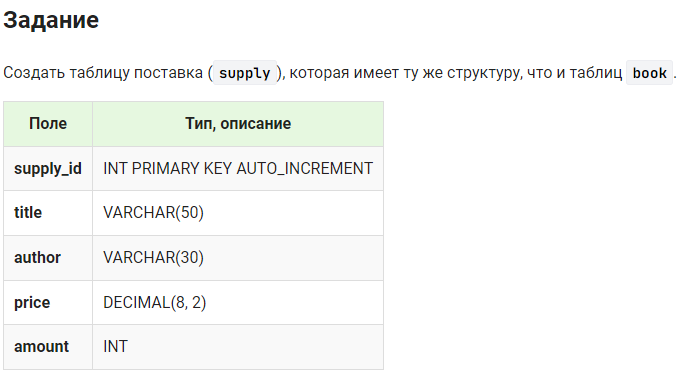

~~~~mySQL
CREATE TABLE supply (
    supply_id INT PRIMARY KEY AUTO_INCREMENT,
        title VARCHAR(50),
       author VARCHAR(30),
        price DECIMAL(8, 2),
       amount INT);
~~~~

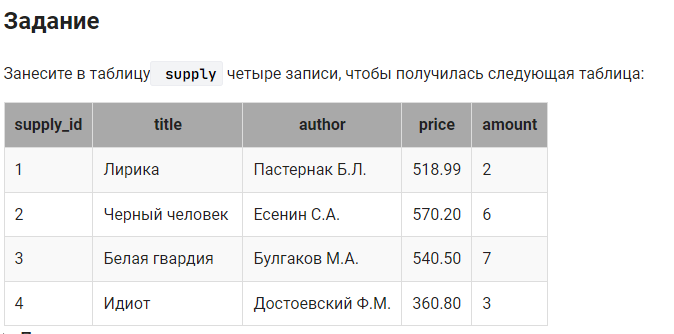

~~~~mySQL
INSERT INTO supply(title, author, price, amount)
VALUES 
      ('Лирика', 'Пастернак Б.Л.', 518.99, 2),
      ('Черный человек', 'Есенин С.А.', 570.20, 6),
      ('Белая гвардия', 'Булгаков М.А.', 540.50, 7),
      ('Идиот', 'Достоевский Ф.М.', 360.80,3);
~~~~

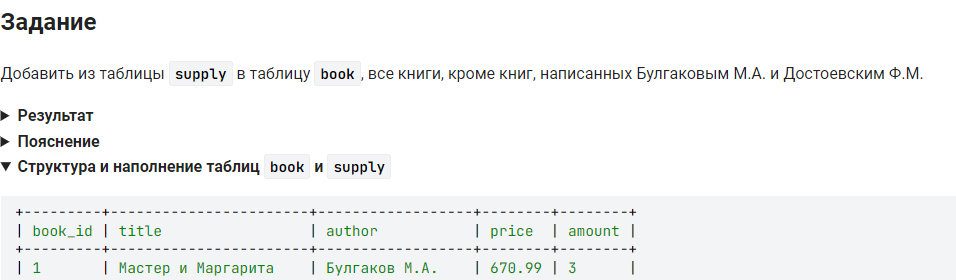

~~~~mySQL
INSERT INTO book(title, author, price, amount)
SELECT title, 
       author, 
       price, 
       amount
  FROM supply
 WHERE author NOT IN ( 'Булгаков М.А.', 'Достоевский Ф.М.');
~~~~

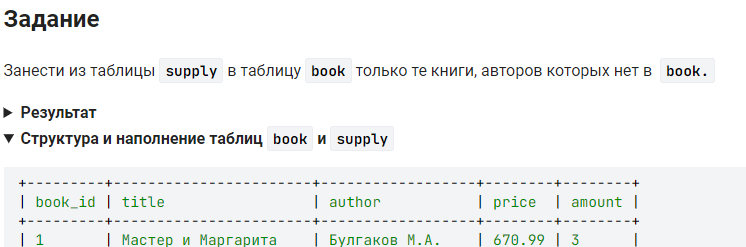

~~~~mySQL
INSERT INTO book (title, author, price, amount)
SELECT title, 
       author, 
       price,
       amount
  FROM supply
 WHERE author NOT IN (SELECT DISTINCT(author)
                        FROM book);
~~~~

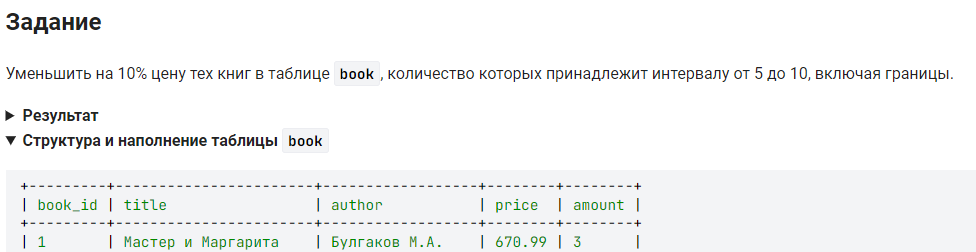

~~~~mySQL
UPDATE book
   SET price = price * 0.9 
 WHERE amount BETWEEN 5 AND 10;
~~~~

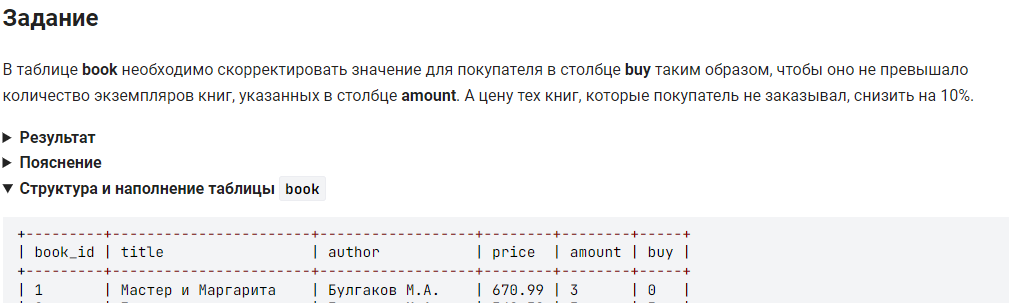

~~~~mySQL
UPDATE book 
   SET price = IF (buy = 0, price * 0.9, price),
       buy = IF (buy < amount, buy, amount);
~~~~

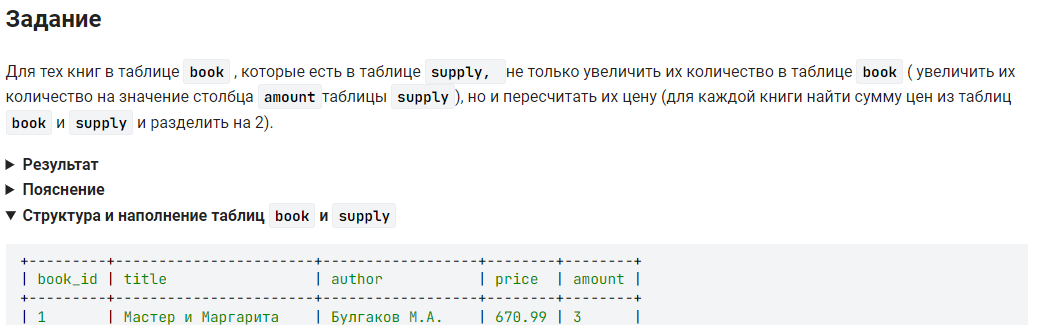

~~~~mySQL
UPDATE book, supply 
   SET book.amount = book.amount + supply.amount,
       book.price = ROUND((book.price + supply.price) / 2, 2)
 WHERE book.title = supply.title 
   AND book.author = supply.author;
~~~~

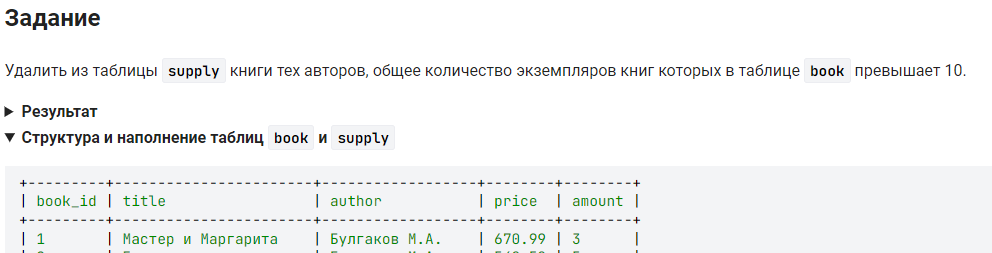

~~~~mySQL
DELETE FROM supply
 WHERE author IN (SELECT author
                        FROM book
                       GROUP BY author
                      HAVING SUM(amount) > 10);
~~~~

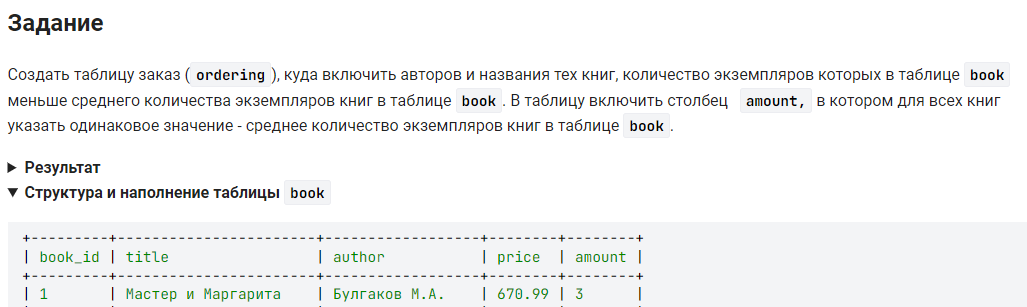

~~~~mySQL
CREATE TABLE ordering
SELECT author,
       title,
       ROUND((SELECT AVG(amount)
                   FROM book))
  FROM book
 WHERE amount < (SELECT AVG(amount)
                   FROM book);
                   
--SELECT * FROM ordering           
~~~~

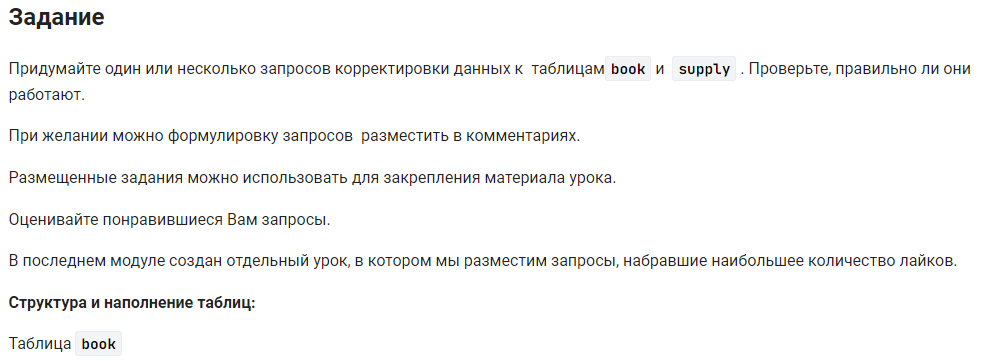

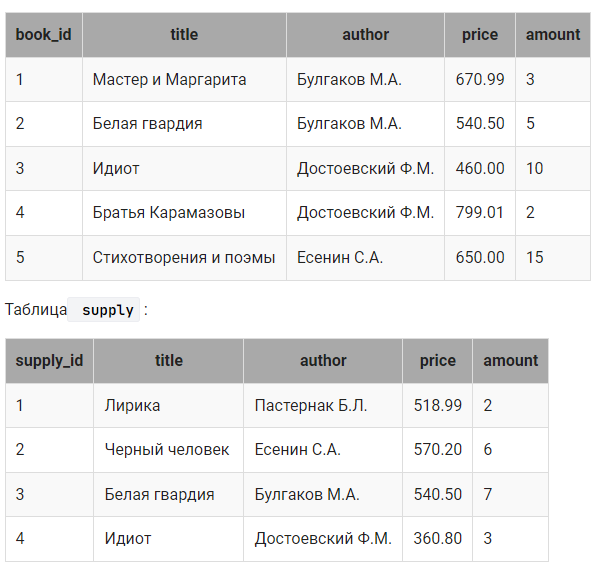

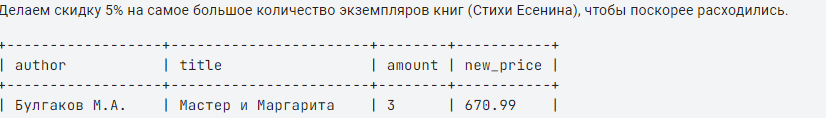

~~~~mySQL
UPDATE book, 
       (SELECT MAX(amount) AS max_amount
          FROM book) AS max_amount
   SET price = ROUND(price * 0.95, 2)
 WHERE amount = max_amount.max_amount;
~~~~